# Transformaciones

## Transformaciones tipo Narrow

### Inciación de la interacción con Spark

#### **`pyspark.sql.SparkSession(sparkContext, jsparkSession=None, options={})`**

Vamos a ver cada uno de los comandos necesarios para inciar Spark

* **`from pyspark.sql import SparkSession`** Desde la librería `from pyspark.sql` se importa la clase `SparkSession` , el cual se usa para crear un `DataFrame`, registrar DataFrame como tablas, ejecutar `SQL` sobre tablas, almacenar tablas en caché y leer archivos.

* **`SparkSession.builder`** : `builder` es un atributo , que actúa como un objeto diseñado para configurar la sesión paso a paso

* **`builder.appName(name)`** : Establecer el nombre de la aplicación , que se mostrará en la aplicación web de spark, si no se configura ningún nombre, se usará uno generado aleatoriamente.

    * **`name`** : *str* Nombre de la aplicación
    * **`Returns`**: `SparkSession.Builder`
* **`builder.master(master)`** :  Comando que le dice a Spark donde se va a ejecutar , recibe como parámetro la *url*. `local[*]` Indica que spark debe correr en tu máquina local , usando un solo proceso, no en clúster distribuido. `[*]` El asterisco es un comodín que le dice a spark "Usa todos los núcleos de la CPU disponibles de la máquina, por ejemplo al poner solo `local` usaría solo un núcleo"

* **`.getOrCreate()`** : Este comando final le dice al constructor, con toda la configuración proporcionada crea la sesión ahora

   * `Get` :  Si ya existe una `SparkSession` activa el entorno , simplemente la devuelve
 
   * `Create` : Si no hay ninguna sesión activa crea una
 
    > Esta configuración de obtener o crear la sesión evita confictos y asegura que solo tengamos una sesión activa ala vez

    * **`master`** : La *url* donde se encuentra spark
    * **`Returns`**: `SparkSession.Builder`
* **`SparkSession.sparkContext`** : Es la interfaz de bajo nivel , necesaria para crear y manipular los `RDD`

In [3]:
#######################################################
#Configuración inicial
#######################################################

import findspark #Librería para encontrar donde está instalado spark
findspark.init() 

from pyspark.sql import SparkSession #Iniciar la sesión de spark

spark = SparkSession.builder \
    .appName("EjemploRDD") \
    .master("local[*]") \
    .getOrCreate() 
#######################################################
sc = spark.sparkContext

#### `parallelize()`
**`SparkContext.parallelize(c, numSlices=None)`**

Crea un `RDD` a partir de una colección de datos existente en la memoria del programa principal . Distribuye una colección total de Python para formar un RDD. Se recomienda usar `range` si la entrada representa un rango por cuestiones de rendimiento

* **`c`** : Colección iterable para distribuir
* **`numSlices`** : *int, optional* Número de particiones del nuevo RDD

In [ ]:
rdd = sc.parallelize([1,2,3,4])  #Se crea un RDD con los números 1, 2, 3, 4

#### 1. `Map()`

* `map(func())` transforma cada elemento del RDD de manera independiente, aplicando la función a cada elemento.
* El resultado es un nuevo RDD donde cada elemento de enetrada se corresponde exactamente con un elemento de salida

In [ ]:
resultado = rdd.map(lambda x : x*2) #Multiplicar cada elemento por 2
print(type(resultado))  #Genera un nuevo RDD mapeado y multiplicado por 2 cada elemento
resultado.collect() #Ejecutar la acción --> Al ejecutar la acción collect() devuelve una lista para que python la interprete

#### 2. `flatmap()`
* `flatmap(func)`  también aplica una función a cada elemento del RDD. Sin embargo, a diferencia de `map()` pueden devolver cero, uno o multiples elementos por cada elemento de entrada . Toma cada elemento, lo transforma en varias partes (puede ser ninguna, una o más de una) y luego aplana todo en una lista
* Los elementos resultantes se "aplanan" automáticamente, creando un RDD unidimensional (Sin estructuras anidadas como listas de listas)

In [11]:
rdd = sc.parallelize(["a b c", "d e", "f"]) #Crear un RDD con cadenas
resultado = rdd.flatMap(lambda x: x.split(" ")) #Dividir cada cadena por espacio
print(resultado.collect()) #Hay 3 elementos de entrada en el rdd inicial y en la salida hay 6 elementos

['a', 'b', 'c', 'd', 'e', 'f']


#### 3. `filter()`

**`RDD.filter(f)`**

Permite filtrar los elementos que cumplen una condición mediante `filter(condition)`
* **f** : *function* Una función para recorrer cada elemento del rdd , mediante una condición
* **Return** : Un nuevo RDD aplicando la condición de la función a cada elemento

In [13]:
rdd = sc.parallelize([1,2,3,4,5,6]) #Creamos el rdd
result = rdd.filter(lambda x: x%2==0) #Filtramos por la condición del módulo 2 de la división
print(result.collect()) #Generamos la lista con los valores que cumplen con la condición

[2, 4, 6]


#### 4. `distinct()`
Al usar distinct eliminaremos los elementos repetidos

In [14]:
rdd = sc.parallelize([1,2,2,3,3,4,5,5,6,6]) #Creamos el rdd
result = rdd.distinct() #Aplicamos el método distinct
print(result.collect()) #Devuelve la lista sin los elementos duplicados

[Stage 9:>                                                          (0 + 8) / 8]

[1, 2, 3, 4, 5, 6]


#### 5. `union()`
Mediante este método unimos dos RDD en uno

In [17]:
rdd1 = sc.parallelize([1,2,3,4]) 
rdd2 = sc.parallelize([5,2,7,8])
result_rdd = rdd2.union(rdd1) #El método realiza la unión de los elementos del rdd1 más los del rdd 2 de manera ordenada
print(result_rdd.collect()) #Devuelve una lista en el mismo orden que se establece la unión

[5, 2, 7, 8, 1, 2, 3, 4]


#### SQL JOINS
De la misma forma que en SQL tenemos las mismas operaciones con los conjuntos de datos
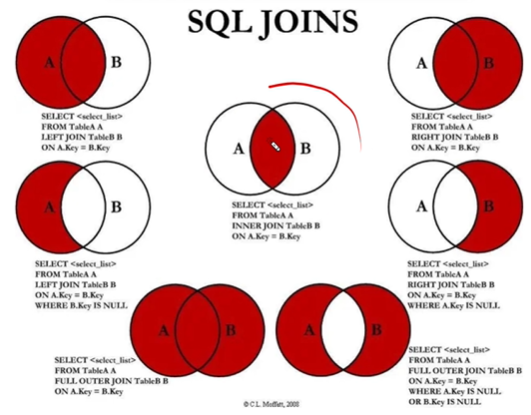

#### 6. `Intersection()`

In [18]:
result_intersection = rdd1.intersection(rdd2)
print(result_intersection.collect())

[Stage 15:=============================================>          (13 + 3) / 16]

[2]


#### 7. `subtract()` (Diferencia)

In [21]:
result_subtarct = rdd1.subtract(rdd2)
print(result_subtarct.collect())

[Stage 17:============================>                            (8 + 8) / 16]

[1, 3, 4]
